In [1]:
!pip install pandas
!pip install -U textblob-de

     |████████████████████████████████| 471kB 2.8MB/s 


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# import the libraries
from textblob_de import TextBlobDE as TextBlob
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt

Mount the google drive file

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Add the shortcut into the mydrive folder.

In [8]:
with open('/content/drive/My Drive/2015_Bayern/result_2015_2.csv') as csvfile:
      header_list = ["Datetime", "Tweet"]
      log = pd.read_csv(csvfile, header=None, names=header_list) 
     
log

,Datetime,Tweet
0,Sat Feb 28 19:22:54 +0000 2015,"Gelesen, daß im Dienst Alkohol tabu ist, und m..."
1,Sat Feb 28 18:07:53 +0000 2015,@EternalReplica @RedIronHead der Zwieback in B...
2,Sat Feb 28 17:46:57 +0000 2015,@ZDFsport bitte beschäftigt stefan Bier viel v...
3,Sat Feb 28 16:28:02 +0000 2015,Letztes anständige Bier vor #MWC15 - ich war s...
4,Fri Feb 27 19:55:03 +0000 2015,@floturba und lass a Bier übrig in da Kreuzalm
5,Fri Feb 27 17:26:24 +0000 2015,Jetzt ist wieder Biernes! #bier #bier #bio #he...
6,Fri Feb 27 16:53:30 +0000 2015,#bolgenplaca #davos Verdientes Bier nach einer...
7,Fri Feb 27 15:32:46 +0000 2015,Ein bier vom fass!
8,Wed Feb 25 20:41:53 +0000 2015,Nehmts dem Gysi das Bier weg! #nockherberg
9,Wed Feb 25 19:29:45 +0000 2015,#UEFA seid bitte bitte keine Arschkriecher der...


In [9]:
# Create a dataframe with a column called tweets,the tweets must include 'Bier'
# !!!!!!
df = pd.DataFrame([tweet for tweet in log['Tweet'] if 'Bier' in tweet], columns=['Tweets'])

# show the first 5 rows of data
#df.head()
df


,Tweets
0,"Gelesen, daß im Dienst Alkohol tabu ist, und m..."
1,@EternalReplica @RedIronHead der Zwieback in B...
2,@ZDFsport bitte beschäftigt stefan Bier viel v...
3,Letztes anständige Bier vor #MWC15 - ich war s...
4,@floturba und lass a Bier übrig in da Kreuzalm
5,Jetzt ist wieder Biernes! #bier #bier #bio #he...
6,#bolgenplaca #davos Verdientes Bier nach einer...
7,Nehmts dem Gysi das Bier weg! #nockherberg
8,#UEFA seid bitte bitte keine Arschkriecher der...
9,Muss am Wetter liegen - hier ist schon wieder ...


Clean the text

In [ ]:
# Creat a function to clean the tweets
# !!!!!!
#modify the codes from https://gist.github.com/tokestermw/cb87a97113da12acb388
FLAGS = re.MULTILINE | re.DOTALL

def cleanTxt(text):

  text = re.sub(r"@\S+", "<user>", text, flags=FLAGS) #replace @mentions with '<user>'
  text = re.sub(r'#', '', text, flags=FLAGS) #remove the '#' symbol 
  text = re.sub(r"https?:\/\/\S+\b|www\.(\w+\.)+\S*|~http", "<url>", text, flags=FLAGS) #replace the hyperlink with '<url>'

  return text

# cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# show the cleaned text
df

,Tweets
0,Und jetzt mit meinem Schalker Freund ein Bier ...
1,selfie Bier <user> <url>/
2,"Inklusive geheimnissvoller Einblicke, Feuer, B..."
3,BVB-Ultras präsentieren Diebesgut von S04-Fans...
4,Bier brauen und Bundesliga. Läuft…
...,...
191,"jedes Bier 2,50 &amp; bei jedem FC Augsburg To..."
192,"jedes Bier 2,50 &amp; bei jedem FC Augsburg To..."
193,"Sitzen jetzt im Essener Stadtpark, diskutieren..."
194,Es gibt kein Bier auf Hawaii! Hier aber zum Gl...


In [ ]:
# create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# create one new column
df['Polarity'] = df['Tweets'].apply(getPolarity)

# show the new dataframe with the new columns
df



196

In [ ]:
#create a function to compute the negative, neutral and postive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
  
df['Analysis'] = df['Polarity'].apply(getAnalysis)



KeyError: ignored

In [ ]:
# print all of the positive tweets
j = 1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')' +sortedDF['Analysis'][i]+ ' ' +sortedDF['Tweets'][i])
    print()
    j = j + 1

1)Positive Das überdurchschnittliche Bier zum durchschnittlichen FCBKOE wollte ich Euch nicht vorenthalten.

2)Positive Kein Wasser mehr im Büro, Kaffeemaschine wurde schon gereinigt, nur noch Bier und Schnaps ist da – NA DANN!

3)Positive Noah und ich gönnen uns gleich unser Vor-Feierabend Bier. Wer nur 2 stunden hat, kann sich das erlauben

4)Positive Ich mag Kunden "Hast Du Lust auf Pizza?!" Ja, aber wenig Zeit... "Ich hol Dich ab, wir bekochen Dich, fahren Dich Heim & es gibt Bier!" 

5)Positive Angekommen beim ADFFitness2015 und auf der Türschwelle gibt es Bier. Super. Danke <user>

6)Positive Und wenn ich groß bin, will ich ein Bier werden ;-) <user> Brauereiausschank auf der… <url>-/

7)Positive Ganz schön platt nach dem Tag! Ein gutes Bier ist da doch eine Wonne.

8)Positive Perfekte Blume: Bier schwappt nicht über - SPIEGEL ONLINE <url>

9)Positive <user> ich hoffe sehr, Chips und Bier stehen Dir begleitend zur Seite.

10)Positive Wer Noch einen besonderen Burger haben möchte,

In [ ]:
# print all of the negative tweets
j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' + sortedDF['Analysis'][i] +' ' +sortedDF['Tweets'][i])
    print()
    j = j + 1

1)Negative BVB-Ultras präsentieren Diebesgut von S04-Fans. Polizei kommt, wird mit Bier beschüttet. Krank. bvbs04

2)Negative Die im Rewe verkaufen vor 10 Uhr kein Bier. fassungslos

3)Negative 6000 Liter Bier unterschlagen <url> frankfurt

4)Negative 2 Typen vor mir an der Kasse bezahlen 1 Kiste Bier, guckt mich der eine an:"Willste mitkommen eins trinken?" 

5)Negative Gestern aufm Geburtstag nur zwei kleine Bier getrunken. Ich kann auch ohne Alkohol schlecht drauf sein. Beispielhafter wird's heute nicht.

6)Negative Dieses Bier ist nicht für dicke Frauen. Aber es ist chillig... 

7)Negative Mir egal wie schlecht es mir geht. Mein Bierchen zum Fußball wird trotzdem getrunken.

8)Negative Mein Kopf tut weh, die Füße stinken und ich kann noch nicht einmal ein Bierchen trinken.

9)Negative Weder Lust auf Bier noch auf Rumpsteak. Wer jetzt noch anzweifelt das ich krank bin, nun ja dann weiß ich auch nicht.

10)Negative Mein Körper fühlt sich an als würde er gleich explodieren und meine M

In [ ]:
# get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

per_ptweets = round((ptweets.shape[0]/df.shape[0])*100, 1)
per_ptweets

23.0

In [ ]:
# get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

per_ntweets = round((ntweets.shape[0]/df.shape[0])*100, 1)
per_ntweets

6.6

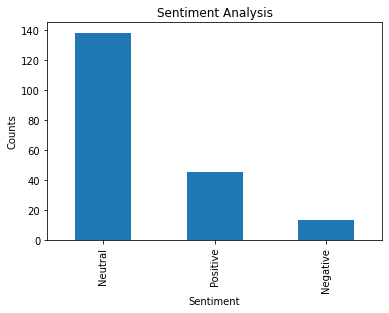

In [ ]:
# show the value counts
df['Analysis'].value_counts()

# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

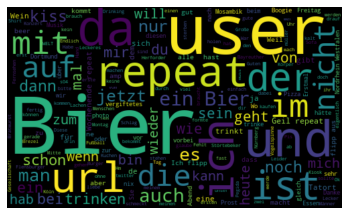

In [ ]:
# Plot the word cloud
allWords = ' '.join([twt for twt in df['Tweets']]) 
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()